# Pipeline

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                    cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)

In [2]:
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print(' : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

 : 0.95


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Parameter

In [3]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(' : {:.2f}'.format(grid.best_score_))
print(' : {:.2f}'.format(grid.score(X_test_scaled, y_test)))
print(' : ', grid.best_params_)

 : 0.98
 : 0.97
 :  {'C': 1, 'gamma': 1}


In [4]:
svm = SVC(C=1, gamma=1)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print(' : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

 : 0.97


In [6]:
import mglearn
mglearn.plots.plot_improper_processing()

In [7]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [8]:
pipe.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [9]:
print(' : {:.2f}'.format(pipe.score(X_test, y_test)))

 : 0.95


# GridSearch with Pipeline

In [10]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [11]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(" : {:.2f}".format(grid.best_score_))
print(" : {:.2f}".format(grid.score(X_test, y_test)))
print(" : {}".format(grid.best_params_))

 : 0.98
 : 0.97
 : {'svm__C': 1, 'svm__gamma': 1}


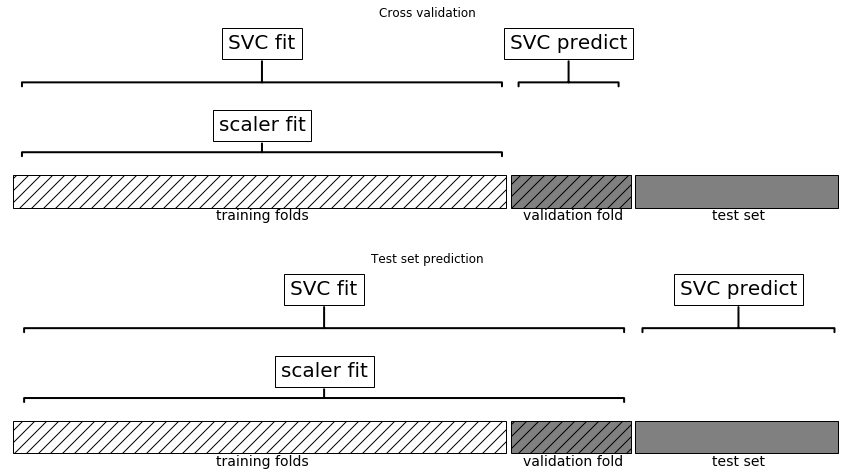

In [12]:
mglearn.plots.plot_proper_processing()

In [15]:
import numpy as np
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [16]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print('X_selected.shape: {}'.format(X_selected.shape))

X_selected.shape: (100, 500)


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print(' (): {:.2f}'.format(np.mean(cross_val_score(Ridge(), X_selected, 
                                                  y, cv=5))))

 (): 0.91


In [21]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        print(name, estimator)
        X_transformed = estimator.fit_transform(X_transformed, y)
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [23]:
fit(pipe, X, y)

scaler MinMaxScaler(copy=True, feature_range=(0, 1))


ValueError: Unknown label type: 'continuous'

In [24]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
# transform
        X_transformed = step[1].transform(X_transformed)
# predict
    return self.steps[-1][1].predict(X_transformed)

### make pipeline

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [29]:
print(" :\n{}".format(pipe_short.steps))

 :
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print(" :\n{}".format(pipe.steps))

 :
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, \
cancer.target, test_size=0.3, random_state=77)

In [32]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), PCA(n_components=2),
LogisticRegression(solver='liblinear', random_state=1))

In [33]:
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.9590643274853801

### step attribute

In [34]:
pipe.fit(cancer.data, cancer.target)
components = pipe.named_steps["pca"].components_
print("components.shape: {}".format(components.shape))

components.shape: (2, 30)


In [35]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [36]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [37]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print(" :\n{}".format(grid.best_estimator_))

 :
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])


In [39]:
print(" :\n{}".format(
grid.best_estimator_.named_steps["logisticregression"]))

 :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [40]:
print(" :\n{}".format(
grid.best_estimator_.named_steps["logisticregression"].coef_))

 :
[[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.39256847 -0.12293451 -0.38827425 -0.4169485  -0.32533663 -0.13926972]]


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = \
    train_test_split(boston.data, boston.target,
                     random_state=0)
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [42]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [43]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

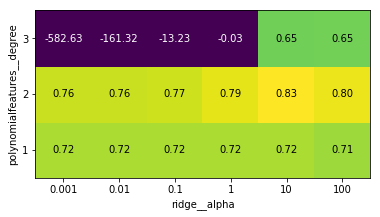

In [44]:
import mglearn
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
xlabel="ridge__alpha", ylabel="polynomialfeatures__degree",
xticklabels=param_grid['ridge__alpha'],
yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [45]:
print(" : {}".format(grid.best_params_))

 : {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [46]:
print(" : {:.2f}".\
format(grid.score(X_test, y_test)))

 : 0.77


In [47]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(" : {:.2f}".\
format(grid.score(X_test, y_test)))

 : 0.63


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Model Selection

In [48]:
pipe = Pipeline([('preprocessing', StandardScaler()), \
('classifier', SVC())])

In [50]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
{'classifier': [SVC()], 'preprocessing': [StandardScaler()],
'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'classifier': [RandomForestClassifier(n_estimators=100)],
'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(" :\n{}\n".format(grid.best_params_))
print(" : {:.2f}".format(grid.best_score_))
print(" : {:.2f}".format(grid.score(X_test, y_test)))

 :
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

 : 0.99
 : 0.98
